## EDA on US Superstore dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv("US Superstore.csv", encoding = 'latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,8-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,8-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-6-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df['Customer ID'].nunique()

793

In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## No null values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [11]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [12]:
df['City'].nunique()

531

In [13]:
city_names = df.City.value_counts().index
city_names

Index(['New York City', 'Los Angeles', 'Philadelphia', 'San Francisco',
       'Seattle', 'Houston', 'Chicago', 'Columbus', 'San Diego', 'Springfield',
       ...
       'Goldsboro', 'Holyoke', 'Yucaipa', 'Commerce City', 'San Mateo',
       'Glenview', 'Missouri City', 'Rochester Hills', 'Palatine',
       'Manhattan'],
      dtype='object', name='City', length=531)

In [14]:
city_value = df.City.value_counts().values
city_value

array([915, 747, 537, 510, 428, 377, 314, 222, 170, 163, 157, 125, 115,
        95,  90,  82,  81,  68,  63,  61,  60,  59,  57,  57,  53,  52,
        51,  49,  46,  45,  45,  44,  44,  43,  42,  42,  42,  41,  40,
        39,  39,  37,  36,  36,  36,  35,  32,  32,  31,  31,  31,  30,
        30,  29,  29,  29,  28,  28,  27,  27,  26,  26,  26,  26,  25,
        25,  24,  24,  24,  24,  24,  23,  23,  23,  23,  23,  22,  22,
        22,  21,  21,  21,  20,  20,  20,  19,  19,  19,  19,  18,  18,
        18,  17,  17,  17,  16,  16,  16,  16,  16,  16,  16,  16,  16,
        16,  15,  15,  15,  15,  15,  15,  15,  14,  14,  14,  14,  14,
        14,  14,  14,  13,  13,  13,  13,  13,  13,  13,  13,  13,  13,
        13,  12,  12,  12,  12,  11,  11,  11,  11,  11,  11,  11,  11,
        11,  11,  11,  11,  11,  11,  11,  11,  11,  10,  10,  10,  10,
        10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,
        10,  10,   9,   9,   9,   9,   9,   9,   9,   9,   9,   

In [15]:
citySummary = pd.DataFrame({'City':city_names, 'Count': city_value})
citySummary

,City,Count
0,New York City,915
1,Los Angeles,747
2,Philadelphia,537
3,San Francisco,510
4,Seattle,428
...,...,...
526,Glenview,1
527,Missouri City,1
528,Rochester Hills,1
529,Palatine,1


In [16]:
df.groupby('City')['Order ID'].nunique().reset_index().sort_values(by = 'Order ID', ascending = False)

,City,Order ID
329,New York City,450
266,Los Angeles,384
438,San Francisco,265
374,Philadelphia,265
452,Seattle,212
...,...,...
101,Coral Gables,1
386,Port Orange,1
388,Portage,1
99,Coon Rapids,1


In [17]:
df['City'].value_counts().reset_index()

,City,count
0,New York City,915
1,Los Angeles,747
2,Philadelphia,537
3,San Francisco,510
4,Seattle,428
...,...,...
526,Glenview,1
527,Missouri City,1
528,Rochester Hills,1
529,Palatine,1


In [18]:
df['Category'].value_counts().reset_index()
# returns in descending order of the count. 

,Category,count
0,Office Supplies,6026
1,Furniture,2121
2,Technology,1847


In [19]:
df.groupby('Category').size().reset_index()
# records the first value under category and continues from there. 

,Category,0
0,Furniture,2121
1,Office Supplies,6026
2,Technology,1847


([<matplotlib.patches.Wedge at 0x27662206600>,
 [Text(0.6696011572356373, 0.8727166150754182, 'New York City'),
  Text(-0.9315012523646876, 0.5850687283072123, 'Los Angeles'),
  Text(-0.8233056455897145, -0.7294983303202985, 'Philadelphia'),
  Text(0.2215501782627797, -1.077457896398616, 'San Francisco'),
  Text(1.0004911567962655, -0.4571842573541552, 'Seattle')],
 [Text(0.36523699485580213, 0.4760272445865917, '29.17%'),
  Text(-0.5080915921989205, 0.31912839725847947, '23.81%'),
  Text(-0.44907580668529884, -0.39790818017470825, '17.12%'),
  Text(0.12084555177969801, -0.5877043071265178, '16.26%'),
  Text(0.5457224491615994, -0.24937323128408462, '13.64%')])

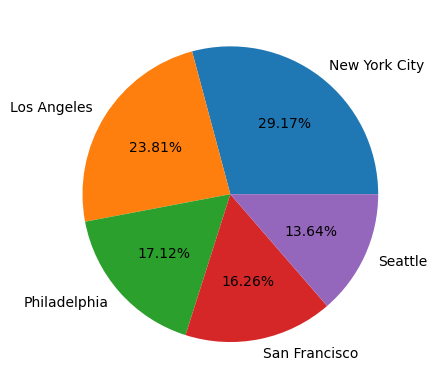

In [20]:
plt.pie(city_value[:5], labels = city_names[:5], autopct = '%1.2f%%')

## This shows the distribution orders placed from different cities, taking only the top 5 into consideration. We can conclude that New York City had the most amount of orders, followed by Los Angeles, Philadelphia, San Fransico and Seattle.

 ** *****************************************************************************************************************

In [23]:
df['Customer Name'].nunique()

793

In [24]:
customer_count = df.groupby('Customer Name')['Order ID'].nunique().reset_index().rename(columns = {'Order ID': 'Customer Count'})
customer_count.sort_values(by = "Customer Count", ascending = False).head(5)

,Customer Name,Customer Count
259,Emily Phan,17
663,Sally Hughsby,13
267,Erin Ashbrook,13
586,Patrick Gardner,13
791,Zuschuss Carroll,13


## Customers who have ordered the most. 

 ** *****************************************************************************************************************

## This shows the count of unique customers who have ordered from different categories. 
## It can be concluded that there are more number of unique consumers looking for office supplies.

In [28]:
df.groupby(['Category'])['Customer Name'].nunique().reset_index()

,Category,Customer Name
0,Furniture,707
1,Office Supplies,788
2,Technology,687


In [29]:
df['Category'].nunique()

3

In [30]:
df['Sub-Category'].nunique()

17

In [31]:
df['Sub-Category'].value_counts().index

Index(['Binders', 'Paper', 'Furnishings', 'Phones', 'Storage', 'Art',
       'Accessories', 'Chairs', 'Appliances', 'Labels', 'Tables', 'Envelopes',
       'Bookcases', 'Fasteners', 'Supplies', 'Machines', 'Copiers'],
      dtype='object', name='Sub-Category')

In [32]:
df['Sub-Category'].value_counts().values

array([1523, 1370,  957,  889,  846,  796,  775,  617,  466,  364,  319,
        254,  228,  217,  190,  115,   68], dtype=int64)

In [33]:
df['Sub-Category'].value_counts().reset_index()

,Sub-Category,count
0,Binders,1523
1,Paper,1370
2,Furnishings,957
3,Phones,889
4,Storage,846
5,Art,796
6,Accessories,775
7,Chairs,617
8,Appliances,466
9,Labels,364


In [34]:
df['Category'].value_counts().reset_index()

,Category,count
0,Office Supplies,6026
1,Furniture,2121
2,Technology,1847


In [35]:
df.groupby(['Category'])['Sub-Category'].nunique().reset_index().sort_values(by = 'Sub-Category', ascending = False)

,Category,Sub-Category
1,Office Supplies,9
0,Furniture,4
2,Technology,4


In [36]:
df.groupby(['Category','Sub-Category']).size().reset_index().rename(columns = {0: 'Count'})

,Category,Sub-Category,Count
0,Furniture,Bookcases,228
1,Furniture,Chairs,617
2,Furniture,Furnishings,957
3,Furniture,Tables,319
4,Office Supplies,Appliances,466
5,Office Supplies,Art,796
6,Office Supplies,Binders,1523
7,Office Supplies,Envelopes,254
8,Office Supplies,Fasteners,217
9,Office Supplies,Labels,364


## The most ordered item (in relation to sub-category) was binders for office supplies, followed by paper for office supplies. 

 ** *****************************************************************************************************************

In [39]:
df.groupby(['City'])['Sub-Category'].nunique().reset_index().sort_values(by = 'Sub-Category', ascending = False)

,City,Sub-Category
207,Houston,17
94,Columbus,17
329,New York City,17
374,Philadelphia,17
464,Springfield,17
...,...,...
170,Goldsboro,1
171,Grand Island,1
388,Portage,1
386,Port Orange,1


In [40]:
category_profit = df.groupby('Category')['Profit'].sum().reset_index()
category_profit

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


## This shows that technology is the most profitable. 

 ** *****************************************************************************************************************

In [43]:
df.groupby('Region')['Sub-Category'].value_counts().reset_index()

,Region,Sub-Category,count
0,Central,Binders,366
1,Central,Paper,321
2,Central,Storage,210
3,Central,Furnishings,205
4,Central,Phones,200
...,...,...,...
63,West,Fasteners,72
64,West,Supplies,69
65,West,Envelopes,67
66,West,Machines,39


## The most ordered product was binders in the central region 

In [45]:
df['Region'].value_counts().reset_index()

,Region,count
0,West,3203
1,East,2848
2,Central,2323
3,South,1620


## Most of the orders were placed in the west. 

([<matplotlib.patches.Wedge at 0x27663c34980>,
 [Text(0.587972350722521, 0.9296711863803422, 'West'),
  Text(-1.0703729729254798, 0.2535777964070795, 'East'),
  Text(-0.1946821397722153, -1.0826351483550272, 'Central'),
  Text(0.960424836742563, -0.5362687133965782, 'South')],
 [Text(0.32071219130319323, 0.5070933743892775, '32.05%'),
  Text(-0.5838398034138981, 0.1383151616765888, '28.50%'),
  Text(-0.10619025805757197, -0.5905282627391056, '23.24%'),
  Text(0.5238680927686706, -0.2925102073072245, '16.21%')])

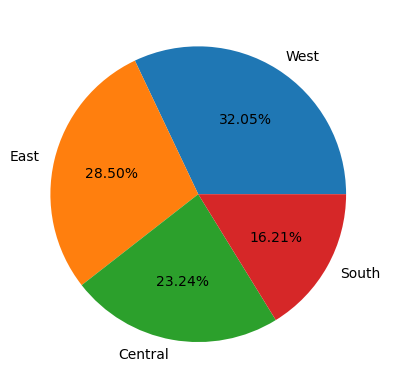

In [47]:
region_count = df['Region'].value_counts().values
region_name = df['Region'].value_counts().index
plt.pie(region_count, labels = region_name, autopct = '%1.2f%%')

## This shows the divison of orders placed in different regions of the country, west being the most dominant.

 ** *****************************************************************************************************************

In [78]:
subcat_counts = df.groupby(['Region', 'Sub-Category']).size().reset_index(name='Count')

# Find the most preferred sub-category in each region
preferred_subcat = subcat_counts.loc[subcat_counts.groupby('Region')['Count'].idxmax()].reset_index(drop=True)

In [80]:
preferred_subcat

,Region,Sub-Category,Count
0,Central,Binders,366
1,East,Binders,440
2,South,Binders,246
3,West,Binders,471


 ** *****************************************************************************************************************

In [83]:
df.groupby(['Region', 'Category', 'Sub-Category']).size().reset_index(name='Count').sort_values(by = 'Count', ascending = False)

,Region,Category,Sub-Category,Count
57,West,Office Supplies,Binders,471
61,West,Office Supplies,Paper,450
23,East,Office Supplies,Binders,440
27,East,Office Supplies,Paper,378
6,Central,Office Supplies,Binders,366
...,...,...,...,...
15,Central,Technology,Machines,21
31,East,Technology,Copiers,20
49,South,Technology,Machines,18
14,Central,Technology,Copiers,16


In [85]:
furniture_df = df[df['Category'] == 'Furniture']
#furniture_df
furniture_df.groupby(['Category', 'Region']).size().reset_index(name='Count').sort_values(by = 'Count', ascending = False)

,Category,Region,Count
3,Furniture,West,707
1,Furniture,East,601
0,Furniture,Central,481
2,Furniture,South,332


In [87]:
furniture_df = df[df['Category'] == 'Furniture']
#furniture_df
furniture_df.groupby(['Category', 'Region', 'Sub-Category']).size().reset_index(name='Count').sort_values(by = 'Count', ascending = False)

,Category,Region,Sub-Category,Count
14,Furniture,West,Furnishings,304
6,Furniture,East,Furnishings,283
13,Furniture,West,Chairs,207
2,Furniture,Central,Furnishings,205
5,Furniture,East,Chairs,168
10,Furniture,South,Furnishings,165
1,Furniture,Central,Chairs,154
15,Furniture,West,Tables,116
9,Furniture,South,Chairs,88
7,Furniture,East,Tables,80


In [89]:
officesupplies_df = df[df['Category'] == 'Office Supplies']
#officesupplies_df
officesupplies_df.groupby(['Region', 'Sub-Category']).size().reset_index(name='Count').sort_values(by = 'Count', ascending = False)

,Region,Sub-Category,Count
29,West,Binders,471
33,West,Paper,450
11,East,Binders,440
15,East,Paper,378
2,Central,Binders,366
6,Central,Paper,321
34,West,Storage,266
28,West,Art,250
20,South,Binders,246
16,East,Storage,242


In [91]:
technology_df = df[df['Category'] == 'Technology']
#technology_df
technology_df.groupby(['Region', 'Sub-Category']).size().reset_index(name='Count').sort_values(by = 'Count', ascending = False)

,Region,Sub-Category,Count
15,West,Phones,277
7,East,Phones,272
12,West,Accessories,258
4,East,Accessories,206
3,Central,Phones,200
0,Central,Accessories,183
11,South,Phones,140
8,South,Accessories,128
14,West,Machines,39
6,East,Machines,37


In [93]:
df.groupby(['Category','Sales']).value_counts().reset_index()

,Category,Sales,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,...,State,Postal Code,Region,Product ID,Sub-Category,Product Name,Quantity,Discount,Profit,count
0,Furniture,1.892,8184,CA-2017-155642,18-05-2017,22-05-2017,Standard Class,BM-11575,Brendan Murry,Corporate,...,Illinois,60653,Central,FUR-FU-10001918,Furnishings,C-Line Cubicle Keepers Polyproplyene Holder Wi...,1,0.6,-0.9933,1
1,Furniture,1.988,1359,CA-2017-160045,26-04-2017,27-04-2017,First Class,LB-16735,Larry Blacks,Consumer,...,Texas,76106,Central,FUR-FU-10000010,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",1,0.6,-1.4413,1
2,Furniture,2.032,3334,CA-2017-122595,14-12-2017,20-12-2017,Standard Class,GM-14455,Gary Mitchum,Home Office,...,Illinois,60653,Central,FUR-FU-10002963,Furnishings,"Master Caster Door Stop, Gray",1,0.6,-1.3208,1
3,Furniture,2.328,1107,US-2016-110156,19-11-2016,24-11-2016,Standard Class,EH-13945,Eric Hoffmann,Consumer,...,Texas,77041,Central,FUR-FU-10000206,Furnishings,"GE General Purpose, Extra Long Life, Showcase ...",2,0.6,-0.7566,1
4,Furniture,2.328,8562,CA-2016-132829,23-12-2016,26-12-2016,Second Class,LA-16780,Laura Armstrong,Corporate,...,Texas,77041,Central,FUR-FU-10000206,Furnishings,"GE General Purpose, Extra Long Life, Showcase ...",2,0.6,-0.7566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Technology,10499.970,4191,CA-2017-166709,17-11-2017,22-11-2017,Standard Class,HL-15040,Hunter Lopez,Consumer,...,Delaware,19711,East,TEC-CO-10004722,Copiers,Canon imageCLASS 2200 Advanced Copier,3,0.0,5039.9856,1
9990,Technology,11199.968,2624,CA-2017-127180,22-10-2017,24-10-2017,First Class,TA-21385,Tom Ashbrook,Home Office,...,New York,10024,East,TEC-CO-10004722,Copiers,Canon imageCLASS 2200 Advanced Copier,4,0.2,3919.9888,1
9991,Technology,13999.960,8154,CA-2017-140151,23-03-2017,25-03-2017,First Class,RB-19360,Raymond Buch,Consumer,...,Washington,98115,West,TEC-CO-10004722,Copiers,Canon imageCLASS 2200 Advanced Copier,4,0.0,6719.9808,1
9992,Technology,17499.950,6827,CA-2016-118689,2-10-2016,9-10-2016,Standard Class,TC-20980,Tamara Chand,Corporate,...,Indiana,47905,Central,TEC-CO-10004722,Copiers,Canon imageCLASS 2200 Advanced Copier,5,0.0,8399.9760,1


In [94]:
df.groupby('Category')['Sales'].sum().reset_index().sort_values(by = 'Sales', ascending = False)

,Category,Sales
2,Technology,836154.0330
0,Furniture,741999.7953
1,Office Supplies,719047.0320


In [95]:
df.groupby('Category')['Sales'].size().reset_index().sort_values(by = 'Sales',ascending = False)

,Category,Sales
1,Office Supplies,6026
0,Furniture,2121
2,Technology,1847


## This concludes that even though the technology has the least number of sales, it was the most profitable

## This also concludes that even though office supplies were sold the most in number, it was the least profitable

 ** *****************************************************************************************************************

In [101]:
df.groupby('Category')['Sales'].count().reset_index()

,Category,Sales
0,Furniture,2121
1,Office Supplies,6026
2,Technology,1847


In [103]:
df.groupby('City')['Sales'].count().reset_index().sort_values(by = 'Sales', ascending = False)

,City,Sales
329,New York City,915
266,Los Angeles,747
374,Philadelphia,537
438,San Francisco,510
452,Seattle,428
...,...,...
402,Redwood City,1
203,Holyoke,1
398,Redding,1
213,Iowa City,1


## This shows that New York City had the most number of customers placing orders. 

 ** *****************************************************************************************************************

In [107]:
df.groupby(['City', 'Category', 'Sub-Category', 'Sales']).size().reset_index().sort_values(by = 'Sales', ascending = False)

,City,Category,Sub-Category,Sales,0
3406,Jacksonville,Technology,Machines,22638.480,1
3546,Lafayette,Technology,Copiers,17499.950,1
8833,Seattle,Technology,Copiers,13999.960,1
5915,New York City,Technology,Copiers,11199.968,1
6091,Newark,Technology,Copiers,10499.970,1
...,...,...,...,...,...
4853,Mesquite,Office Supplies,Binders,0.876,1
6636,Philadelphia,Office Supplies,Binders,0.852,1
916,Chicago,Office Supplies,Binders,0.836,1
9452,Waco,Office Supplies,Binders,0.556,1


## It can be conluded that Jacksonville made the most amount of sales selling machines.

 ** *****************************************************************************************************************

In [111]:
df.groupby(['City', 'Category', 'Sub-Category', 'Profit']).size().reset_index().sort_values(by = 'Profit', ascending = False)

,City,Category,Sub-Category,Profit,0
3559,Lafayette,Technology,Copiers,8399.9760,1
8911,Seattle,Technology,Copiers,6719.9808,1
6141,Newark,Technology,Copiers,5039.9856,1
2006,Detroit,Office Supplies,Binders,4946.3700,1
5027,Minneapolis,Office Supplies,Binders,4630.4755,1
...,...,...,...,...,...
919,Chicago,Office Supplies,Binders,-2929.4845,1
4660,Louisville,Technology,Machines,-3399.9800,1
7725,San Antonio,Office Supplies,Binders,-3701.8928,1
645,Burlington,Technology,Machines,-3839.9904,1


## This shows that the city Lafayettee made the amount of profit selling copiers. 

 ** *****************************************************************************************************************

In [115]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [117]:
df.groupby(['City', 'Category']).size().reset_index(name = 'Count').sort_values(by = 'Count', ascending = False)

,City,Category,Count
744,New York City,Office Supplies,552
601,Los Angeles,Office Supplies,443
986,San Francisco,Office Supplies,322
843,Philadelphia,Office Supplies,312
1017,Seattle,Office Supplies,249
...,...,...,...
872,Port Arthur,Technology,1
870,Port Arthur,Furniture,1
869,Pompano Beach,Technology,1
868,Pompano Beach,Office Supplies,1


In [119]:
df.groupby(['City', 'Category','Sub-Category']).size().reset_index(name = 'Count').sort_values(by = 'Count', ascending = False)

,City,Category,Sub-Category,Count
1852,New York City,Office Supplies,Binders,145
1856,New York City,Office Supplies,Paper,124
1505,Los Angeles,Office Supplies,Paper,118
1501,Los Angeles,Office Supplies,Binders,98
1862,New York City,Technology,Phones,89
...,...,...,...,...
1257,Jonesboro,Furniture,Furnishings,1
1256,Jonesboro,Furniture,Chairs,1
1255,Jonesboro,Furniture,Bookcases,1
1250,Johnson City,Office Supplies,Art,1


## To look at which city frequently orders from the same category:

1. Category-wise: New York City leads in orders, mostly placing orders for office supplies.
2. Sub-Category wise: New York City leads in orders, mostly placing orders for binders. 

 ** *****************************************************************************************************************

In [144]:
categ_count = df.groupby(['City', 'Category']).size().reset_index(name = 'Count').sort_values(by = 'Count', ascending = False).head(10)
categ_count

,City,Category,Count
744,New York City,Office Supplies,552
601,Los Angeles,Office Supplies,443
986,San Francisco,Office Supplies,322
843,Philadelphia,Office Supplies,312
1017,Seattle,Office Supplies,249
475,Houston,Office Supplies,231
743,New York City,Furniture,192
180,Chicago,Office Supplies,187
745,New York City,Technology,171
600,Los Angeles,Furniture,154


<function matplotlib.pyplot.show(close=None, block=None)>

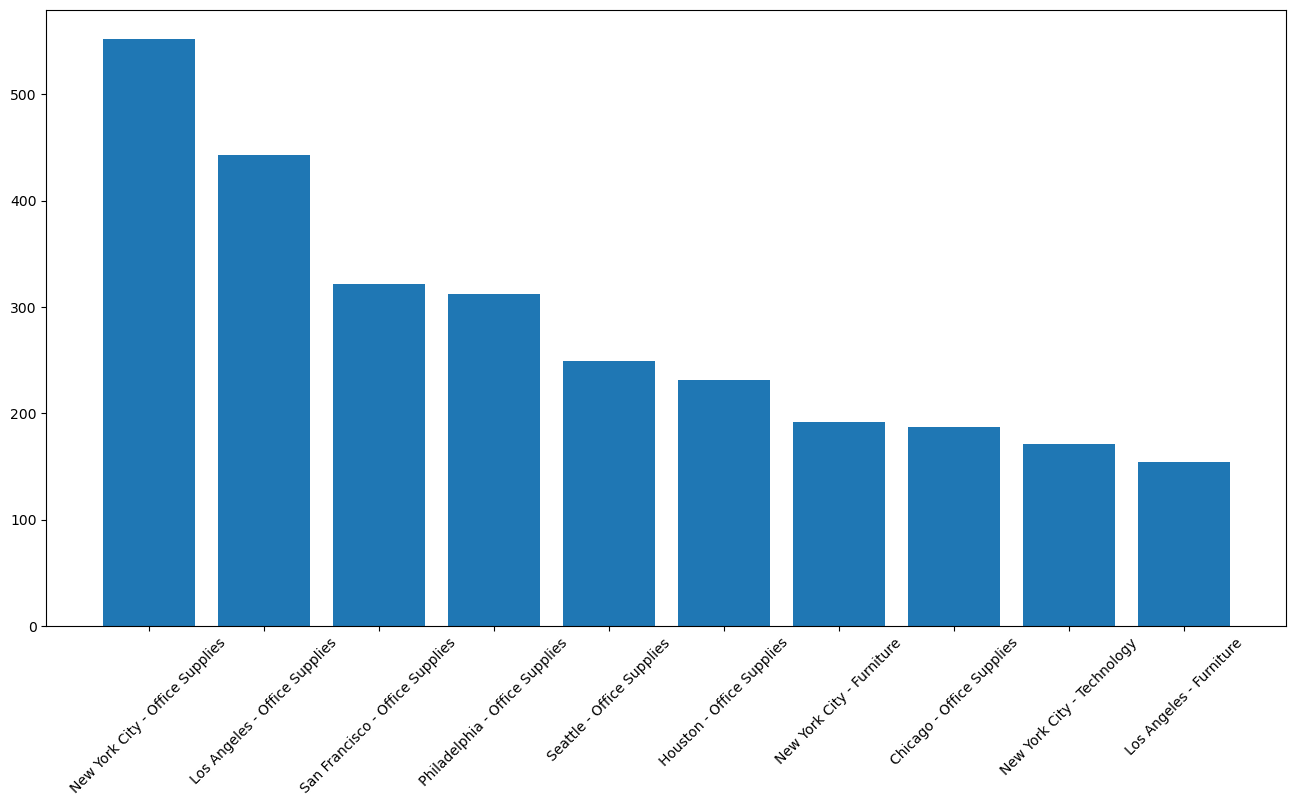

In [125]:
plt.figure(figsize = (16,8))
plt.bar(categ_count['City']  + ' - ' + categ_count['Category'], categ_count['Count'])
plt.xticks(rotation=45)
plt.show

([<matplotlib.patches.Wedge at 0x27665b1cef0>,
 [Text(-0.3496380660429372, 1.0429540846910543, 'Office Supplies'),
  Text(-0.27974354545119656, -1.0638343615330323, 'Furniture'),
  Text(0.9197467277963864, -0.6033787837733774, 'Technology')],
 [Text(-0.1907116723870566, 0.5688840461951205, '60.30%'),
  Text(-0.15258738842792538, -0.5802732881089266, '21.22%'),
  Text(0.5016800333434834, -0.32911570024002396, '18.48%')])

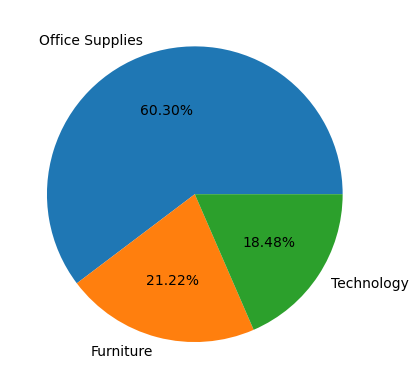

In [126]:
categ_names = df['Category'].value_counts().index
categ_count = df['Category'].value_counts().values
plt.pie(categ_count, labels = categ_names, autopct = '%1.2f%%')

In [127]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [129]:
df.groupby(['Customer Name', 'City', 'Category','Sub-Category','Product ID']).nunique().reset_index().head(10)

,Customer Name,City,Category,Sub-Category,Product ID,Row ID,Order ID,Order Date,Ship Date,Ship Mode,...,Segment,Country,State,Postal Code,Region,Product Name,Sales,Quantity,Discount,Profit
0,Aaron Bergman,Arlington,Office Supplies,Storage,OFF-ST-10000321,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,Aaron Bergman,Oklahoma City,Furniture,Bookcases,FUR-BO-10003966,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,Aaron Bergman,Oklahoma City,Technology,Phones,TEC-PH-10000562,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,Aaron Bergman,Seattle,Furniture,Chairs,FUR-CH-10004477,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Aaron Bergman,Seattle,Office Supplies,Art,OFF-AR-10001427,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,Aaron Bergman,Seattle,Office Supplies,Storage,OFF-ST-10002344,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,Aaron Hawkins,Gulfport,Furniture,Furnishings,FUR-FU-10003691,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,Aaron Hawkins,Los Angeles,Furniture,Chairs,FUR-CH-10002439,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,Aaron Hawkins,Los Angeles,Office Supplies,Paper,OFF-PA-10003063,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9,Aaron Hawkins,New York City,Office Supplies,Labels,OFF-LA-10003148,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [132]:
df['Product ID'].nunique()

1862

In [134]:
cust_count = df.groupby('Customer Name')['Order ID'].nunique().reset_index().sort_values(by = 'Order ID', ascending = False).head(10).rename(columns = {'Order ID' : 'Count'})
cust_count

,Customer Name,Count
259,Emily Phan,17
663,Sally Hughsby,13
267,Erin Ashbrook,13
586,Patrick Gardner,13
791,Zuschuss Carroll,13
145,Chloris Kastensmidt,13
381,Joel Eaton,13
574,Noel Staavos,13
629,Rick Bensley,12
624,Resi Pölking,12


## Top 10 customers who have purchased unique products.

 ** *****************************************************************************************************************

In [139]:
customer_order_counts = df.groupby('Customer Name')['Order ID'].nunique().reset_index()
customer_city = df.groupby('Customer Name')['City'].first().reset_index()
customer_order_counts.columns = ['Customer Name', 'Unique Order Count']
result = pd.merge(customer_order_counts, customer_city, on='Customer Name')
result = result.sort_values(by='Unique Order Count', ascending=False)
result.head(10)

,Customer Name,Unique Order Count,City
259,Emily Phan,17,Chicago
663,Sally Hughsby,13,San Francisco
267,Erin Ashbrook,13,Charlotte
586,Patrick Gardner,13,San Francisco
791,Zuschuss Carroll,13,Salem
145,Chloris Kastensmidt,13,Philadelphia
381,Joel Eaton,13,Memphis
574,Noel Staavos,13,Chicago
629,Rick Bensley,12,Chicago
624,Resi Pölking,12,Cleveland


## This shows the list of customers who have place the most amount of orders

 ** *****************************************************************************************************************